In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "drive/MyDrive/BeautyNet/archive.zip" -d "drive/MyDrive/BeautyNet/Images"

In [ ]:
import cv2

img = cv2.imread("drive/MyDrive/BeautyNet/Images/images to predict/3.jpg")
img.shape

(854, 1200, 3)

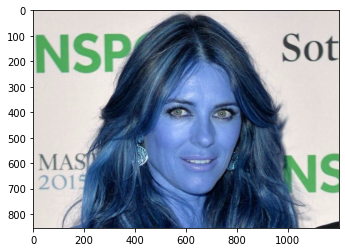

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
train_dir = "drive/MyDrive/BeautyNet/Images/train"
test_dir = "drive/MyDrive/BeautyNet/Images/test"
val_dir = "drive/MyDrive/BeautyNet/Images/valid"

In [ ]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

In [ ]:
train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (224,224),
                                           class_mode = "binary"
                                           )
test_data = test_gen.flow_from_directory(test_dir,
                                         target_size = (224,224),
                                         class_mode = "binary"
                                         )
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size = (224,224),
                                       class_mode = "binary"
                                       )

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


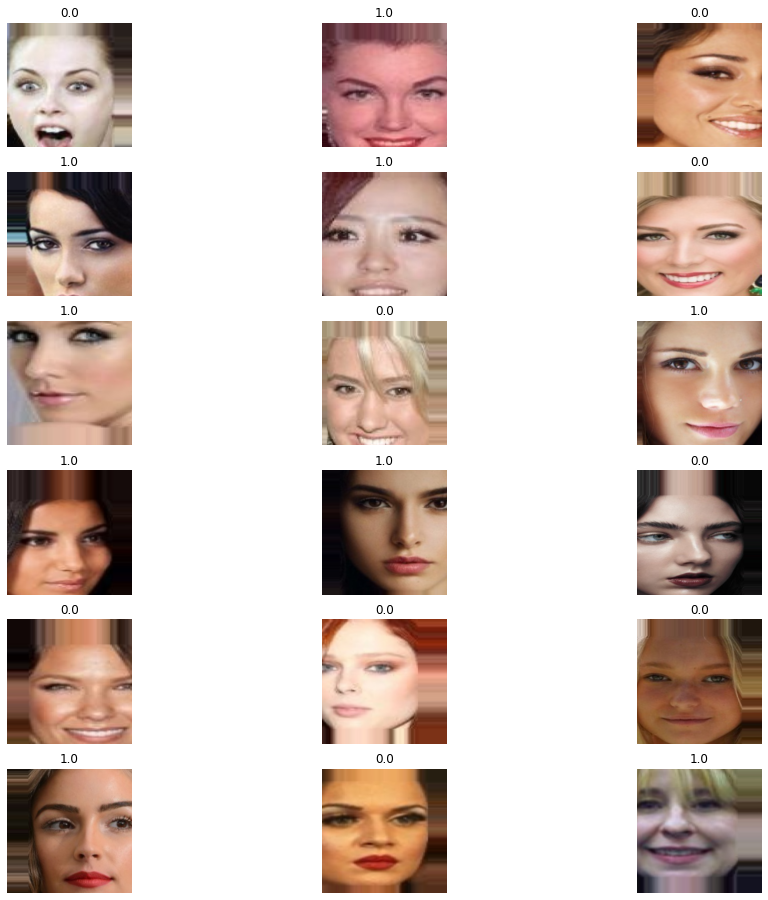

In [ ]:
#let's see first 6 images
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(6):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(label[int(label[i])])
  plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
                             layers.Conv2D(filters= 62, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 62, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 62, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Flatten(),


                             layers.Dense(128, activation= "relu"),
                             layers.Dropout(0.5),

                             layers.Dense(1, activation= "sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 62)      806       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 62)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 62)      15438     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 62)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 62)        15438     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 62)       0

In [ ]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model.fit(train_data,
          epochs = 10,#take more number of epochs for better accuracy
          steps_per_epoch = len(train_data),
          validation_data = val_data,
          validation_steps = len(val_data)
)

Epoch 1/10
125/125 [==============================] - 358s 3s/step - loss: 0.5578 - accuracy: 0.7387 - val_loss: 0.5975 - val_accuracy: 0.7667
Epoch 2/10
125/125 [==============================] - 359s 3s/step - loss: 0.4993 - accuracy: 0.7745 - val_loss: 0.5022 - val_accuracy: 0.7700
Epoch 3/10
125/125 [==============================] - 364s 3s/step - loss: 0.4813 - accuracy: 0.7940 - val_loss: 0.4959 - val_accuracy: 0.7833
Epoch 4/10
125/125 [==============================] - 359s 3s/step - loss: 0.4122 - accuracy: 0.8285 - val_loss: 0.3886 - val_accuracy: 0.8400
Epoch 5/10
125/125 [==============================] - 360s 3s/step - loss: 0.3801 - accuracy: 0.8372 - val_loss: 0.2517 - val_accuracy: 0.8967
Epoch 6/10
125/125 [==============================] - 361s 3s/step - loss: 0.3496 - accuracy: 0.8615 - val_loss: 0.2493 - val_accuracy: 0.9067
Epoch 7/10
125/125 [==============================] - 365s 3s/step - loss: 0.3155 - accuracy: 0.8673 - val_loss: 0.1776 - val_accuracy: 0.9267

In [ ]:
results = model.evaluate(test_data)

10/10 [==============================] - 7s 678ms/step - loss: 0.1595 - accuracy: 0.9433


In [ ]:
print(f"Model Accuracy: {results[1] * 100 : 0.2f} %")

Model Accuracy:  94.33 %


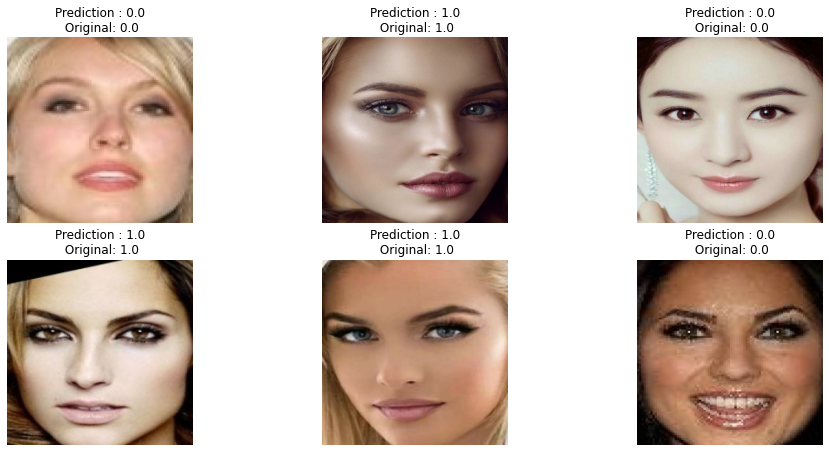

In [ ]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(6):

  image, label = test_data.next()

  model_pred = model.predict(image) 

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction : {label[int(tf.round(model_pred[i]))]}\n Original: {label[int(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

model.save('drive/MyDrive/BeautyNet/model/BeautyNet.h5')
print('Model Saved!')
 
# load model
savedModel = load_model('drive/MyDrive/BeautyNet/model/BeautyNet.h5')
savedModel.summary()

Model Saved!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 62)      806       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 62)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 62)      15438     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 62)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 62)        15438     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27